In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

Available workers: 16


# Raspberry-Pi Data

### Testing new RPi Melanogaster data 

In [14]:
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_psd_best.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)

In [15]:
dspath = "/home/kalfasyan/data/wingbeats/Melanogaster_Rpi_converted_wingbeats"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[0], rpiformat=True)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

evaluate_data(wbpf.df, model, batch_size=16, transforms_list=[Bandpass(lowcut=140, highcut=1500), TransformWingbeat(setting='psdl2')])

Found 216 in dataset: /home/kalfasyan/data/wingbeats/Melanogaster_Rpi_converted_wingbeats, and 216 label(s): ['20211217_091728_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091742_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091802_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091816_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091830_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091843_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091855_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091924_drosophila-suzukii_Tna_Hna.wav'
 '20211217_091955_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092020_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092050_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092127_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092151_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092229_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092315_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092343_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092505_drosophila-suzukii_Tna_Hna.wav'
 '20211217_092535_drosophila-suzukii_Tna_

Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


Testing..	:  46%|████▌     | 6/13 [00:00<00:00, 50.48it/s]

Finished.


Testing..	: 100%|██████████| 13/13 [00:00<00:00, 27.44it/s]

Accuracy: 83.92
Balanced accuracy: 83.92
Confusion matrix: 
[[0.83919598 0.16080402]
 [0.         0.        ]]
0    167
1     32
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


### Testing new RPi Suzukii data 

In [16]:
dspath = "/home/kalfasyan/data/wingbeats/Suzukii_Rpi_converted_wingbeats"

#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210328/wingbeats"
#44100#"/home/kalfasyan/data/wingbeats/twin_cages_experiment/sensorPi/freeflight"
#48000#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210402/wingbeats"
#48000#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210328/wingbeats"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[1], rpiformat=True)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)
# wbpf.plot_random_wbts()
# print(wbpf.df.shape[0])

evaluate_data(wbpf.df, model, batch_size=8, transforms_list=[TransformWingbeat(setting='psdl2')])

Found 128 in dataset: /home/kalfasyan/data/wingbeats/Suzukii_Rpi_converted_wingbeats, and 128 label(s): ['20210328_191917_Tna_Hna.wav' '20210328_192456_Tna_Hna.wav'
 '20210328_192553_Tna_Hna.wav' '20210328_192714_Tna_Hna.wav'
 '20210328_193045_Tna_Hna.wav' '20210328_193643_Tna_Hna.wav'
 '20210328_193734_Tna_Hna.wav' '20210328_193908_Tna_Hna.wav'
 '20210328_194951_Tna_Hna.wav' '20210328_195121_Tna_Hna.wav'
 '20210328_195317_Tna_Hna.wav' '20210328_195811_Tna_Hna.wav'
 '20210328_195835_Tna_Hna.wav' '20210328_200848_Tna_Hna.wav'
 '20210328_202817_Tna_Hna.wav' '20210328_205127_Tna_Hna.wav'
 '20210328_205735_Tna_Hna.wav' '20210328_205756_Tna_Hna.wav'
 '20210328_210203_Tna_Hna.wav' '20210328_210238_Tna_Hna.wav'
 '20210328_210505_Tna_Hna.wav' '20210328_211812_Tna_Hna.wav'
 '20210328_212342_Tna_Hna.wav' '20210328_213208_Tna_Hna.wav'
 '20210328_213249_Tna_Hna.wav' '20210328_213311_Tna_Hna.wav'
 '20210328_213808_Tna_Hna.wav' '20210328_214018_Tna_Hna.wav'
 '20210328_214208_Tna_Hna.wav' '20210328_2

Testing..	:   0%|          | 0/15 [00:00<?, ?it/s]

Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


Testing..	: 100%|██████████| 15/15 [00:00<00:00, 109.33it/s]

Accuracy: 89.83
Balanced accuracy: 89.83
Confusion matrix: 
[[0.         0.        ]
 [0.10169492 0.89830508]]
1    106
0     12
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


# SD card data

In [6]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [7]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

transforms_list_test = [Bandpass(lowcut=140, highcut=1500), TransformWingbeat(setting='psdl2')]
BASE_DATACREATEDDIR

Path('/home/kalfasyan/projects/wbai/data_created')

In [8]:
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_psd_best.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)

### Testing with new SD card data - Melanogasters

In [9]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[0], rpiformat=False)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

evaluate_data(wbpf.df, model, batch_size=8, transforms_list=transforms_list_test)

Found 11136 in dataset: /home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


Testing..	:   1%|          | 5/740 [00:00<00:15, 48.33it/s]

Finished.


Testing..	: 100%|██████████| 740/740 [00:09<00:00, 80.40it/s]

Accuracy: 89.17
Balanced accuracy: 89.17
Confusion matrix: 
[[0.89168638 0.10831362]
 [0.         0.        ]]
0    5277
1     641
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


### Testing with new SD card data - Suzukiis

In [10]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Suzukii_202111_SD/"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[1], rpiformat=False)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

evaluate_data(wbpf.df, model, batch_size=8, transforms_list=transforms_list_test)

Found 2725 in dataset: /home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Suzukii_202111_SD/, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


Testing..	:   4%|▍         | 9/213 [00:00<00:02, 82.13it/s]

Finished.


Testing..	: 100%|██████████| 213/213 [00:02<00:00, 82.24it/s]

Accuracy: 69.95
Balanced accuracy: 69.95
Confusion matrix: 
[[0.         0.        ]
 [0.30046948 0.69953052]]
1    1192
0     512
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


### Testing with original controlled test set

In [11]:
test_df = pd.read_parquet('../data_created/suzmel_test.parquet')
test_dataset = DataFrameset(pd.concat([test_df.iloc[:,0], test_df.iloc[:,1]], axis=1), transform=transforms.Compose(transforms_list_test))
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
_ = test_model(model,test_dataloader, test_dataset)

Testing..	: 100%|██████████| 803/803 [00:09<00:00, 85.30it/s] 

Accuracy: 81.94
Balanced accuracy: 81.17
Confusion matrix: 
[[0.6751114 0.3248886]
 [0.0517432 0.9482568]]


### Testing with remote-uncontrolled test set

In [12]:
extra_df = pd.read_csv('../data_created/suzmel_extra.csv')
X_extra, y_extra = extra_df.iloc[:,0], extra_df.iloc[:,1]

extra_dataset = DataFrameset(pd.concat([X_extra, y_extra], axis=1), transform=transforms.Compose(transforms_list_test))
extra_dataloader = DataLoader(extra_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, worker_init_fn=worker_init_fn)
_ = test_model(model,extra_dataloader, extra_dataset)

Testing..	: 100%|██████████| 797/797 [00:08<00:00, 89.30it/s] 

Accuracy: 93.30
Balanced accuracy: 86.63
Confusion matrix: 
[[0.79157589 0.20842411]
 [0.05892109 0.94107891]]


# UMAP

In [13]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [14]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

transforms_list_test = [Bandpass(lowcut=140, highcut=1500), TransformWingbeat(setting='psdl2')]
BASE_DATACREATEDDIR

Path('/home/kalfasyan/projects/wbai/data_created')

In [15]:
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_psd.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)

In [16]:
model = nn.Sequential(*list(model.children())[:-1])
list(model.children())[-1]

AdaptiveAvgPool2d(output_size=(2048, 1))

In [17]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[2], rpiformat=False)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

new_dataset = DataFrameset(pd.concat([wbpf.df.iloc[:,0], wbpf.df.iloc[:,1]], axis=1), transform=transforms.Compose(transforms_list_test))
new_dataloader = DataLoader(new_dataset, batch_size=32, shuffle=False)
out_new = get_all_preds(model, new_dataloader)
X_new_mel, y_new_mel = out_new[0].detach().cpu().numpy(), out_new[1].detach().cpu().numpy()

Found 11136 in dataset: /home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [2]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


  2%|▏         | 3/185 [00:00<00:07, 25.70it/s]

Finished.


100%|██████████| 185/185 [00:07<00:00, 24.69it/s]


In [18]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Suzukii_202111_SD/"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[3], rpiformat=False)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

new_dataset = DataFrameset(pd.concat([wbpf.df.iloc[:,0], wbpf.df.iloc[:,1]], axis=1), transform=transforms.Compose(transforms_list_test))
new_dataloader = DataLoader(new_dataset, batch_size=32, shuffle=False)
out_new = get_all_preds(model, new_dataloader)
X_new_suz, y_new_suz = out_new[0].detach().cpu().numpy(), out_new[1].detach().cpu().numpy()

Found 2725 in dataset: /home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Suzukii_202111_SD/, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [3]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


  6%|▌         | 3/54 [00:00<00:02, 25.45it/s]

Finished.


100%|██████████| 54/54 [00:02<00:00, 24.56it/s]


In [19]:
test_df = pd.read_parquet('../data_created/suzmel_test.parquet')
test_dataset = DataFrameset(pd.concat([test_df.iloc[:,0], test_df.iloc[:,1]], axis=1), transform=transforms.Compose(transforms_list_test))
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

out = get_all_preds(model, test_dataloader)
X_test = out[0].detach().cpu().numpy()
y_test = out[1].detach().cpu().numpy()

100%|██████████| 803/803 [00:08<00:00, 95.08it/s] 


In [20]:
# extra_df = pd.read_csv('../data_created/suzmel_extra.csv')
# extra_dataset = DataFrameset(pd.concat([extra_df.iloc[:,0], extra_df.iloc[:,1]], axis=1), transform=transforms.Compose(transforms_list_test))
# extra_dataloader = DataLoader(extra_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True, worker_init_fn=worker_init_fn)
# out_xtra = get_all_preds(model, test_dataloader)
# X_extra = out_xtra[0].detach().cpu().numpy()
# y_extra = out_xtra[1].detach().cpu().numpy()

In [21]:
X_test_and_xtra = np.vstack((X_test,X_new_mel,X_new_suz)).squeeze()
y_test_and_xtra = np.hstack((y_test,y_new_mel,y_new_suz)).squeeze()

In [22]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test_and_xtra)
embedding.shape

(33307, 2)

In [23]:
import seaborn as sns
y_test_and_xtra.shape

(33307,)

<AxesSubplot:>

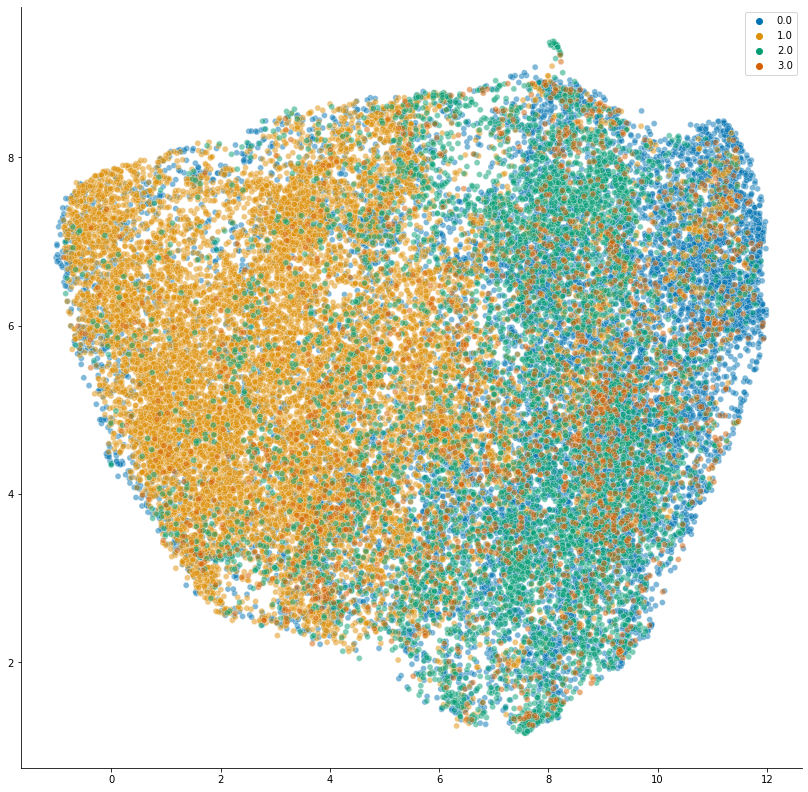

In [24]:
plt.figure(figsize=(14,14))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y_test_and_xtra, alpha=0.5, palette='colorblind')